# RGB 3 色合成図を作る

適当なデータを用意して、3色合成してみます。

## python コード

In [1]:
import n2

import numpy
import astroquery.skyview
from astropy.units import deg
from astropy.units import arcmin

%matplotlib inline
import matplotlib.pyplot

[15:32:48,991] INFO: python 3.6.5
[15:32:48,992] INFO: n2-tools 0.0.7


In [2]:
target = 'RCW98'
survey = ['WISE 22', 'WISE 12', 'WISE 3.4']
radius = 1.5 * deg
pixels = 1000

In [3]:
urls = astroquery.skyview.SkyView.get_image_list(target, survey, radius=radius, pixels=pixels)
urls

['https://skyview.gsfc.nasa.gov/tempspace/fits/skv42477076196787_1.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv42477076196787_2.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv42477076196787_3.fits']

In [4]:
r = n2.open_fits(urls[0])
g = n2.open_fits(urls[1])
b = n2.open_fits(urls[2])

[15:32:51,289] INFO: (open_fits) path=https://skyview.gsfc.nasa.gov/tempspace/fits/skv42477076196787_1.fits, hdu_num=0
[15:32:51,312] WARNING: (verify_header) Empty keyword: BUNIT
[15:32:51,313] WARNING: (verify_header) Empty keyword: BMAJ
[15:32:51,313] WARNING: (verify_header) Empty keyword: BMIN
[15:32:51,324] INFO: (open_fits) path=https://skyview.gsfc.nasa.gov/tempspace/fits/skv42477076196787_2.fits, hdu_num=0
[15:32:51,332] WARNING: (verify_header) Empty keyword: BUNIT
[15:32:51,332] WARNING: (verify_header) Empty keyword: BMAJ
[15:32:51,333] WARNING: (verify_header) Empty keyword: BMIN
[15:32:51,344] INFO: (open_fits) path=https://skyview.gsfc.nasa.gov/tempspace/fits/skv42477076196787_3.fits, hdu_num=0
[15:32:51,354] WARNING: (verify_header) Empty keyword: BUNIT
[15:32:51,355] WARNING: (verify_header) Empty keyword: BMAJ
[15:32:51,356] WARNING: (verify_header) Empty keyword: BMIN


In [5]:
img = n2.jpy_rgbimage(r.data, g.data, b.data)
img

Image(value=b'BM\xe6q\x0b\x00\x00\x00\x00\x006\x00\x00\x00(\x00\x00\x00\xf4\x01\x00\x00\xf4\x01\x00\x00\x01\x0…

In [14]:
# img.save('plot-rgbimage-rgb.jpg')

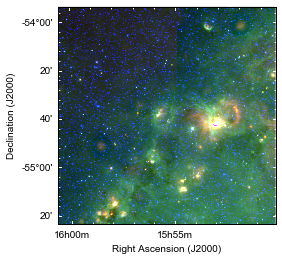

In [15]:
matplotlib.rcParams['xtick.color'] = 'w'
matplotlib.rcParams['ytick.color'] = 'w'

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection=r.wcs)
ax.imshow(img.get_image())
ax.set_xlim(0, r.data.shape[1])
ax.set_ylim(0, r.data.shape[0])
ax.coords[0].set_axislabel('Right Ascension (J2000)')
ax.coords[0].set_major_formatter('hh:mm')
ax.coords[0].set_ticks(spacing=5*15*arcmin)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].set_axislabel('Declination (J2000)')
ax.coords[1].set_major_formatter('dd:mm')
ax.coords[1].set_ticks(spacing=20*arcmin)
ax.coords[1].display_minor_ticks(True)
fig.savefig('plot-rgbimage.jpg', dpi=50)